## Import Statements

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.morphology import erosion

## Question 3

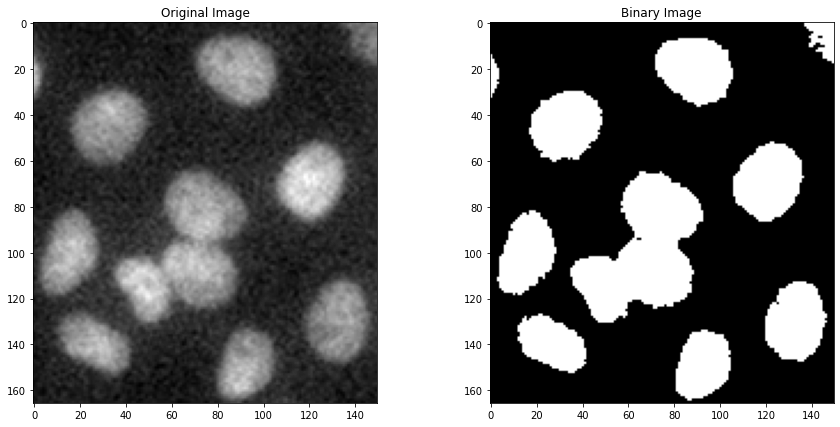

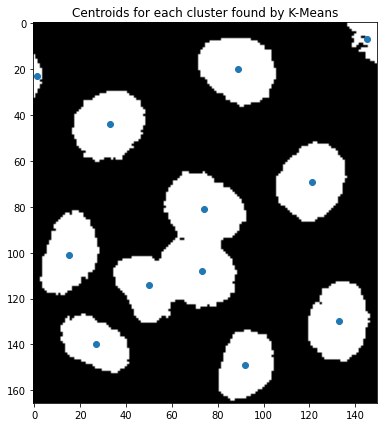

In [ ]:
# convert the image into a feature map and apply KMeans algorithm to get the cluster centroids 

X = np.asarray(np.where(binary_img == 255)).T
kmeans_model = KMeans(n_clusters = 12, max_iter = 300)
kmeans_model.fit(X)

plt.figure(figsize = (10, 7))


# plot the centroids
f1 = np.round(kmeans_model.cluster_centers_.T[1]).astype(np.int16)
f2 = np.round(kmeans_model.cluster_centers_.T[0]).astype(np.int16)

ax = plt.gca()
X_f = np.asarray([f1, f2])
plt.scatter(f1, f2)
plt.imshow(binary_img, cmap = "gray")
plt.title("Centroids for each cluster found by K-Means")
plt.show()

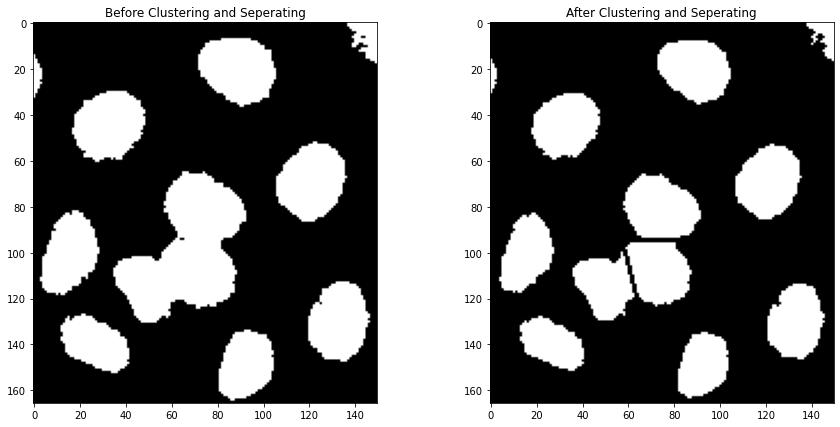

In [ ]:
# set the number iterations for eroding an image
erosion_level = 1

# define a blank final image
final_img = np.zeros_like(binary_img)

# add each eroded cluster
for i in range(12):

  # get the labels for each point, corresponding to each predicted cluster
  labels_index = X[np.where(kmeans_model.labels_ == i)[0]]

  # define a blank image
  blank_image = np.zeros_like(binary_img)
  
  # plot all the points of each cluster on the blank image
  for j in labels_index:
    blank_image[j[0], j[1]] = 255
  
  # erode the blank image to prevent it touching from other clusters
  for k in range(erosion_level):
    blank_image = erosion(blank_image)
  
  # add the cluster to the final image
  final_img += blank_image

# plot both the images
fig, ax = plt.subplots(1, 2, figsize = (15, 7))
ax[0].imshow(binary_img, cmap = "gray")
ax[0].set_title("Before Clustering and Seperating")
ax[1].set_title("After Clustering and Seperating")
ax[1].imshow(final_img, cmap = "gray")
plt.show()

## Question 4

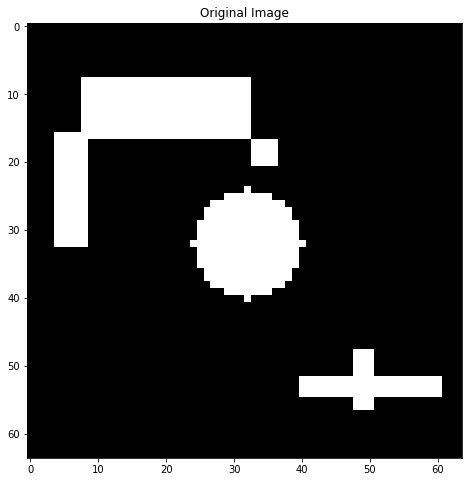

In [3]:
# read the image
og_img = cv.imread("/content/shapes.png",cv.IMREAD_GRAYSCALE)
# convert the image into a binary image
(thresh, binary_img) = cv.threshold(og_img, 100, 1, cv.THRESH_BINARY)
# plot the image
plt.figure(figsize = (8, 8))
plt.imshow(binary_img, cmap = "gray")
plt.title("Original Image")
plt.show()

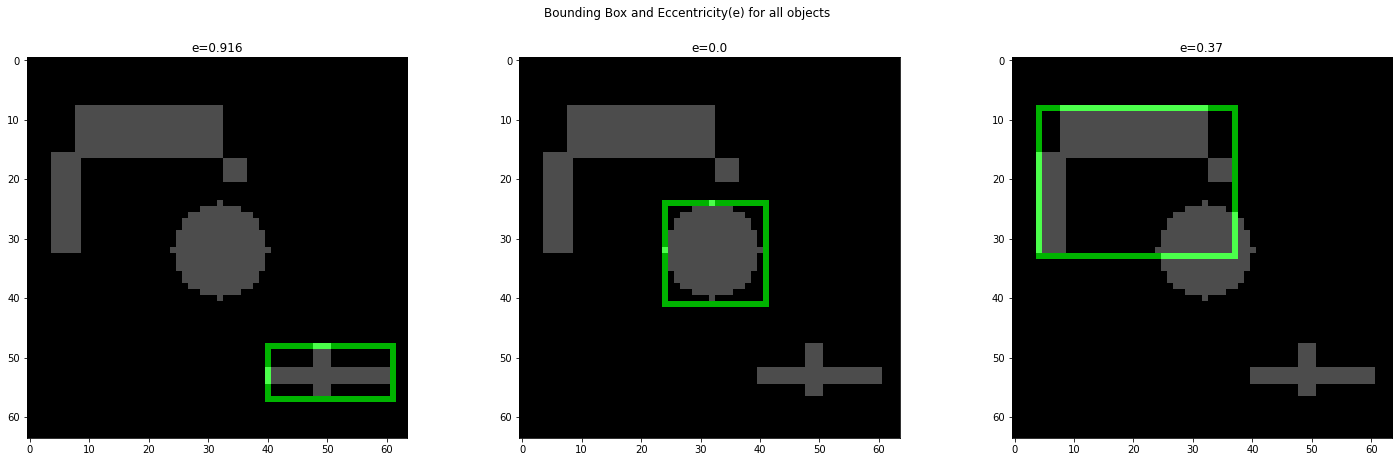

In [7]:
# get a copy of the image and draw contours on the copy
edged = binary_img.copy()
contours, hierarchy = cv.findContours(edged, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# plot the required figures
nrows = 1
ncols = 3

fig, ax = plt.subplots(nrows, ncols, figsize = (25, 7))

for row in range(nrows):
  for col in range(ncols):

    contour_no = row*ncols + col
    # fit ellipse
    (x,y),(MA,ma),angle = cv.fitEllipse(contours[contour_no])
    im = cv.cvtColor(binary_img, cv.COLOR_GRAY2RGB)
    # get the eccentricity
    e = np.sqrt(abs((MA/2)**2 - (ma/2)**2))/max(MA/2, ma/2)
    # get the bounding Rectangle
    x,y,w,h = cv.boundingRect(contours[contour_no])
    # show all
    ax[col].imshow(cv.rectangle(im,(x,y),(x+w,y+h),(0,255,0),1))
    ax[col].imshow(binary_img, cmap = "gray", alpha = 0.3)
    ax[col].set_title(f"e={np.round(e, 3)}")
    
plt.suptitle("Bounding Box and Eccentricity(e) for all objects")
plt.show()